In [3]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt


In [4]:
root_dir = '../data/1680531886'

# Lista para almacenar los datos de todos los archivos CSV
data = []
data_max = pd.DataFrame(columns=['points', 'dino', 'iteration'])
data_max = data_max.astype('int')

# Recorre recursivamente todos los subdirectorios y archivos CSV
for subdir, dirs, files in os.walk(root_dir):
    for file in files:
        # Verifica si el archivo es un archivo CSV
        if file.endswith('.csv'):
            # Lee el archivo CSV y lo agrega a la lista de datos
            file_path = os.path.join(subdir, file)
            csv_data = pd.read_csv(file_path)
            csv_data = csv_data.reset_index().rename(columns={'index': 'indice'})

            file_name = os.path.basename(file_path)[:-4]
            file_parts = file_name.split("_")
            try:
                max_points = file_parts[0]
                dino = file_parts[2]
                iteration = os.path.basename(subdir)
                data_max.loc[len(data_max)] = [int(max_points), int(dino), int(iteration)]
                csv_data['iteration'] = int(iteration)
                csv_data['dino'] = int(dino)
                csv_data['max_points'] = int(max_points)

                data.append(csv_data)
            except:
                pass
            
# Concatena todos los datos de los archivos CSV en un solo DataFrame
df_all = pd.concat(data, ignore_index=True)


In [5]:
df_all

,indice,distance_next,y_next,width_next,height_next,y_dino,game_speed,action,iteration,dino,max_points
0,0,920,305,48,95,250,20.0,1,20,88,44
1,1,900,305,48,95,207,20.0,1,20,88,44
2,2,880,305,48,95,175,20.0,1,20,88,44
3,3,860,305,48,95,152,20.0,1,20,88,44
4,4,840,305,48,95,136,20.0,1,20,88,44
...,...,...,...,...,...,...,...,...,...,...,...
1098770,89,100,236,97,88,117,20.0,0,14,148,96
1098771,90,80,236,97,88,117,20.0,0,14,148,96
1098772,91,60,236,97,88,118,20.0,0,14,148,96
1098773,92,40,236,97,88,122,20.0,0,14,148,96


(array([508096., 575013.,  15666.]),
 array([0.        , 0.66666667, 1.33333333, 2.        ]),
 <BarContainer object of 3 artists>)

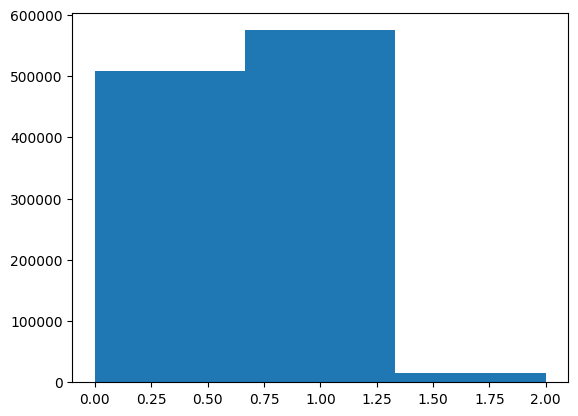

In [6]:
plt.hist(df_all['action'], bins=3)


# Individuo con mas puntos por generación

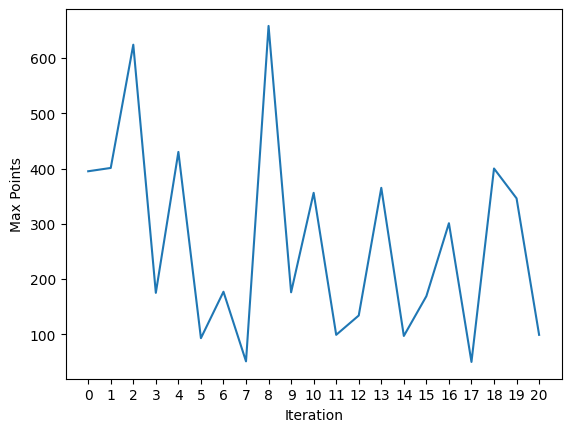

In [15]:
# Agrupa los datos por "iteration" y obtiene el máximo de "points"
grouped = data_max.groupby('iteration')['points'].max()

# Crea el gráfico de línea
plt.plot(grouped.index, grouped.values)

plt.xticks([i for i in range(21)]) 
# Configura los labels de los ejes x e y
plt.xlabel('Iteration')
plt.ylabel('Max Points')

# Muestra el gráfico
plt.show()

# Dinosaurios vivos por iteración y distancia

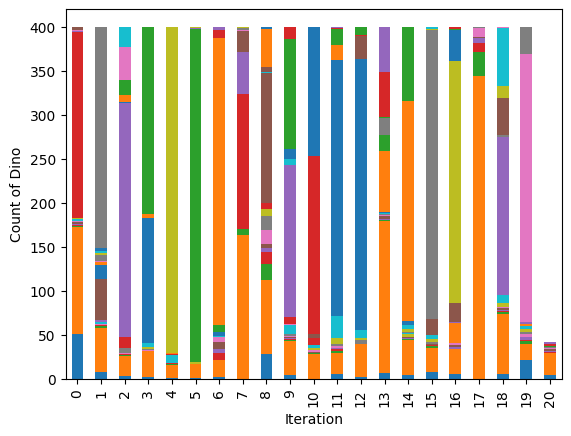

In [8]:
grouped = data_max.groupby(['iteration', 'points'])['dino'].count()

# Crea el plot con los datos agrupados
grouped.unstack().plot(kind='bar', stacked=True, legend=False)

# Configura los labels de los ejes x e y
plt.xlabel('Iteration')
plt.ylabel('Count of Dino')

# Muestra el gráfico
plt.show()

# Distribución de muertes segun distancia

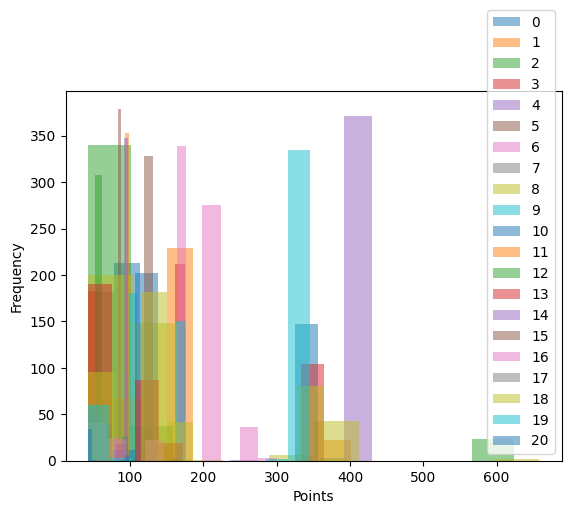

In [9]:
grouped = data_max.groupby('iteration')['points']
for group_name, group_data in grouped:
    plt.hist(group_data, alpha=0.5, label=group_name)

# Configura los labels de los ejes x e y
plt.xlabel('Points')
plt.ylabel('Frequency')

# Muestra la leyenda y el gráfico
plt.legend()
plt.show()

# Media de puntos por iteration

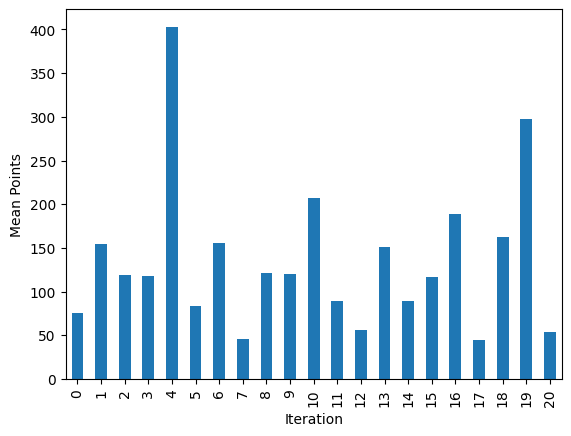

In [10]:
grouped = data_max.groupby(['iteration'])['points'].mean()

# Crea un gráfico de barras apiladas con la media de "points" por "iteration" y "dino"
grouped.plot(kind='bar', legend=False)

# Configura los labels de los ejes x e y
plt.xlabel('Iteration')
plt.ylabel('Mean Points')

# Muestra el gráfico
plt.show()

# Acciones por iteration que causaron la muerte

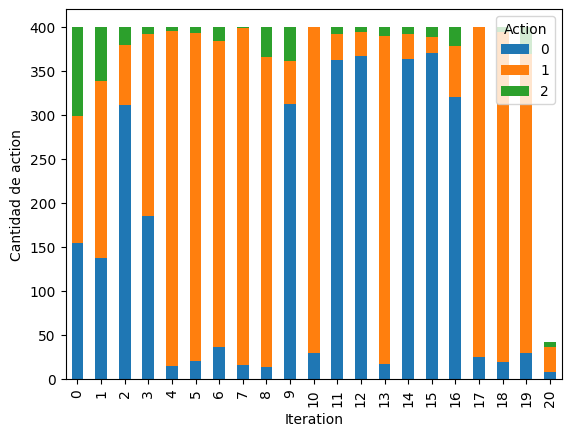

In [11]:
# Obtener el valor maximo de indice por iteration y dino
max_distance = df_all.groupby(['iteration', 'dino'])['indice'].max().reset_index()

# Filtrar el dataframe original con los valores maximos de indice
df_filtered = df_all.merge(max_distance, on=['iteration', 'dino', 'indice'], how='inner')

# Obtener la cantidad de action por iteration y por valor unico de action
df_action_count = df_filtered.groupby(['iteration', 'action'])['dino'].count().reset_index()

# Hacer un pivot para que cada columna represente un valor unico de action
df_action_count_pivot = df_action_count.pivot(index='iteration', columns='action', values='dino').fillna(0)

# Hacer el plot de barras apiladas
df_action_count_pivot.plot(kind='bar', stacked=True)
plt.xlabel('Iteration')
plt.ylabel('Cantidad de action')
plt.legend(title='Action', loc='upper right')
plt.show()